In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

#### Import data & packages for cleaning

In [3]:
import pandas as pd
import string
import regex as re
from nltk.stem.lancaster import LancasterStemmer
df = pd.read_csv("Cleaned_Data.csv")

## Pre-processing data
### Use Regex & Python string library to remove numbers, special characters, capitalizations from tweets. 
#### Stemmer applied as well

In [4]:
df["Tweet"]=df.Tweet.apply(lambda x: re.sub("[^a-zA-Z:,@#'\s]+","",x))
df["Tweet"]=df["Tweet"].apply(lambda x: x.lower())
df["Tweet"] = df.Tweet.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x))
stemmer = LancasterStemmer()
df["Tweet"] = df["Tweet"].apply(lambda x: stemmer.stem(x))

### Second of 4 groups (Tweets #400_001 to #800K each)

In [5]:
tweets_1200K = df["Tweet"][800_001:1_200_001]
tweets_1200K_list = list(tweets_1200K)

In [6]:
tweets_1200K.head()

800001     darealsunisakim thanks for the twitter add  s...
800002    being sick can be really cheap when it hurts t...
800003        lovesbrooklyn he has that effect on everyone 
800004     productoffear you can tell him that i just bu...
800005     rkeithhill thans for your response ihad alrea...
Name: Tweet, dtype: object

### Create stop_word list to remove unnecessary nouns
#### Repetitive nouns or words mistaken as nouns still pose a problem

In [7]:
from sklearn.feature_extraction import text

In [8]:
addl_stop_words = ["ah",
"ahh",
"ahhh",
"ahhhh",
"alot",
"amp",
"aren",
"arent",
"argh",
"ass",
"aw",
"aww",
"awww",
"awwww",
"babe",
"baby",
"bad",
"bc",
"big",
"bit",
"bitch",
"blah",
"boo",
"bout",
"boy",
"boys",
"btw",
"bye",
"cnt",
"cos",
"couldn",
"coz",
"cuz",
"da",
"dam",
"day",
"days",
"dear",
"decent",
"def",
"did",
"didn",
"didnt",
"dnt",
"doesn",
"doesn’t",
"doesnt",
"doin",
"don",
"dont",
"dude",
"feeling",
"fml",
"friday",
"fuck",
"getting",
"girl",
"girls",
"god",
"goin",
"gon",
"gonna",
"good",
"goodbye",
"goodnight",
"goood",
"gosh",
"great",
"gt",
"guess",
"gunna",
"guy",
"guys",
"ha",
"haha",
"hahaha",
"hahahaha",
"hard",
"hav",
"haven",
"havin",
"hell",
"hey",
"hi",
"hope",
"hour",
"hours",
"hrs",
"http",
"huge",
"idk",
"im",
"isn",
"isnt",
"jk",
"jus",
"just",
"kno",
"lady",
"left",
"lil",
"link",
"little",
"ll",
"lmao",
"lol",
"long",
"lot",
"lots",
"love",
"lt",
"luv",
"ma",
"making",
"man",
"monday",
"morning",
"moro",
"morrow",
"mr",
"na",
"nd",
"new",
"nice",
"night",
"nights",
"nite",
"noes",
"nope",
"oh",
"ohh",
"ok",
"okay",
"omg",
"omgosh",
"ones",
"ouch",
"ouch",
"ouch",
"ow",
"ow",
"ow",
"past",
"people",
"plz",
"pm",
"poor",
"poor",
"rd",
"ready",
"ready",
"real",
"real",
"right",
"rip",
"rip",
"saturday",
"shit",
"sleepy",
"sleepy",
"so",
"soo",
"sooo",
"soooo",
"sooooo",
"soooooo",
"sorry",
"st",
"st",
"stay",
"stuff",
"stupid",
"sucks",
"sunday",
"super",
"ta",
"terrible",
"th",
"th",
"thanks",
"thats",
"thing",
"things",
"tho",
"thursday",
"til",
"till",
"time",
"times",
"today",
"tommorow",
"tomorrow",
"tomorrow",
"tomorrow",
"tomorrow",
"tonight",
"tuesday",
"ugh",
"ughh",
"uh",
"ur",
"ve",
"vs",
"vs",
"wait",
"wan",
"wanna",
"want",
"wasn",
"way",
"wednesday",
"wee",
"week",
"weekend",
"weeks",
"wish",
"wit",
"wit",
"wont",
"wouldn",
"wouldnt",
"wow",
"xd",
"xoxo",
"xoxo",
"xx",
"ya",
"ya",
"yay",
"yea",
"yeah",
"year",
"years",
"yes",
"yesterday",
"yo",
"yr"]

In [9]:
stop_word_list = text.ENGLISH_STOP_WORDS.union(addl_stop_words)

### Reducing tweets to nouns for topic modelling
#### Removing filler words as much as possible, testing TextBlob's noun tags vs noun phrases

In [10]:
import nltk
nltk.download('brown')
import textblob
from textblob import TextBlob

[nltk_data] Downloading package brown to
[nltk_data]     /Users/francescaepiccorelli/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [11]:
acceptable_types = ["NN","NNS","NNP","NNPS"]

In [12]:
def nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob_list = TextBlob(string)
        for blob in blob_list.tags:
            if blob[1] in acceptable_types:
                new_string_list.append(blob[0])
        new_string = " ".join(new_string_list)
        new_tweet_list.append(new_string)
    return new_tweet_list

In [13]:
please_work = nouns_only(["Victoria is going to Washington, DC to see George Washington's monument.",
             "Jane fell down the well and hit water"])
print(please_work)

['Victoria Washington DC George Washington monument', 'Jane well hit water']


In [14]:
def blob_nouns_only(string_list):
    new_tweet_list = []
    for string in string_list:
        new_string_list = []
        blob = TextBlob(string)
        noun_list = blob.noun_phrases
        for noun in noun_list:
            new_tweet_list.append(noun)
    return new_tweet_list

In [15]:
nouns_1200K_list = nouns_only(tweets_1200K_list)

In [16]:
phrases_1200K_list = blob_nouns_only(tweets_1200K_list)

In [17]:
nouns_1200K_list[:5]

['thanks twitter sunisa i hin show area sweetheart',
 'food friends',
 'lovesbrooklyn effect everyone',
 'i thanks sulk',
 'rkeithhill thans response answer']

In [18]:
phrases_1200K_list[:5]

['darealsunisakim thanks', 'sunisa i', 'hin show', 'dc area', 'real food']

## NMF Topic Printer for EDA

In [19]:
import numpy as np

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [21]:
def topic_printer(cv,topic_count,solver_type,tweet_list):
    X = cv.fit_transform(tweet_list)
    df = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
    words = np.array(cv.get_feature_names())
    nmf = NMF(n_components=topic_count,solver=solver_type)
    W = nmf.fit_transform(X)
    H = nmf.components_
    for i, topic in enumerate(H):
        print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))
    return

#### Model A: Words must appear in .1% of all 400_000 documents

In [22]:
cv_A = CountVectorizer(stop_words = stop_word_list, min_df = .001)
topic_count_A = 20
solver = 'mu'

In [23]:
#Only using TextBlob noun_phrases, not NLTK
#topic_printer(cv_A,topic_count_A,solver,nouns_800K_list)

#### Same code but with TextBlob Noun Phases

In [24]:
topic_printer(cv_A,topic_count_A,solver,nouns_1200K_list)

/Users/francescaepiccorelli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: background,updates,tweets,phone,page,hello,facebook,followers,account,twitter
Topic 2: trip,church,place,chillin,food,glad,family,dinner,sweet,home
Topic 3: break,sleep,money,minutes,coffee,try,afternoon,lunch,job,work
Topic 4: beach,shopping,place,family,kids,trip,glad,game,sounds,fun
Topic 5: follow,support,words,blog,followers,ff,tweets,kind,followfriday,thank
Topic 6: movies,dinner,luck,book,moon,trek,mileycyrus,star,awards,movie
Topic 7: kids,blog,food,moment,story,job,rest,family,coffee,life
Topic 8: movies,afternoon,followers,lunch,facebook,bbq,food,dinner,family,friends
Topic 9: family,brother,sis,bday,cake,thx,dad,sister,dinner,birthday
Topic 10: exams,hair,graduation,end,job,luck,class,kids,summer,school
Topic 11: jonas,mileycyrus,youtube,online,songs,jonasbrothers,album,head,video,song
Topic 12: kind,game,youtube,mileycyrus,fan,blog,summer,songs,video,music
Topic 13: food,hair,dance,summer,pool,dinner,graduation,bday,family,party
Topic 14: ice,bbq,cream,rain,beach,g

#### Model B: no min_df

In [25]:
cv_B = CountVectorizer(stop_words = stop_word_list)
topic_count_B = 20
solver = 'mu'

In [26]:
topic_printer(cv_B,topic_count_B,solver,nouns_1200K_list)

Topic 1: background,updates,tweets,phone,page,hello,facebook,followers,account,twitter
Topic 2: church,trip,place,chillin,food,glad,family,dinner,sweet,home
Topic 3: sunshine,break,money,minutes,coffee,try,afternoon,lunch,job,work
Topic 4: tons,article,place,kids,family,trip,glad,game,sounds,fun
Topic 5: support,words,blog,followers,ff,tweets,goodness,kind,followfriday,thank
Topic 6: trailer,book,mtv,moon,hannah,trek,mileycyrus,star,awards,movie
Topic 7: race,food,relay,moment,story,job,rest,family,coffee,life
Topic 8: movies,afternoon,followers,lunch,facebook,bbq,food,dinner,family,friends
Topic 9: msn,cake,bday,thx,fuckcity,dad,wishes,sister,dinner,birthday
Topic 10: exams,hair,graduation,end,job,luck,class,kids,summer,school
Topic 11: theme,mileycyrus,online,youtube,songs,jonasbrothers,album,head,video,song
Topic 12: kind,youtube,mileycyrus,game,fan,blog,summer,songs,video,music
Topic 13: hair,dance,summer,pool,grad,dinner,graduation,bday,family,party
Topic 14: ice,bbq,cream,rain,be

#### Model C: max_df. can't appear in more than 20% of documents

In [27]:
cv_C = CountVectorizer(stop_words = stop_word_list,max_df=.20)
topic_count_C = 20
solver = 'mu'

In [28]:
topic_printer(cv_C,topic_count_C,solver,nouns_1200K_list)

Topic 1: background,updates,tweets,phone,page,hello,facebook,followers,account,twitter
Topic 2: church,trip,chillin,place,food,glad,family,dinner,sweet,home
Topic 3: sunshine,break,money,minutes,coffee,try,afternoon,lunch,job,work
Topic 4: tons,article,place,family,kids,trip,glad,game,sounds,fun
Topic 5: support,words,blog,followers,ff,tweets,goodness,kind,followfriday,thank
Topic 6: trailer,book,mtv,moon,hannah,trek,mileycyrus,star,awards,movie
Topic 7: food,race,relay,moment,story,job,rest,family,coffee,life
Topic 8: movies,afternoon,followers,lunch,facebook,bbq,food,dinner,family,friends
Topic 9: msn,cake,bday,thx,fuckcity,dad,wishes,dinner,sister,birthday
Topic 10: exams,hair,graduation,end,job,luck,class,kids,summer,school
Topic 11: theme,mileycyrus,online,youtube,songs,jonasbrothers,album,head,video,song
Topic 12: kind,youtube,mileycyrus,game,fan,blog,summer,songs,video,music
Topic 13: hair,dance,summer,pool,grad,dinner,graduation,bday,family,party
Topic 14: ice,bbq,cream,rain,be

#### Model D: max_df. can't appear in more than 10% of documents

In [29]:
cv_D = CountVectorizer(stop_words = stop_word_list,max_df=.10)
topic_count_D= 20
solver = 'mu'

In [30]:
topic_printer(cv_D,topic_count_D,solver,nouns_1200K_list)

Topic 1: background,updates,tweets,phone,page,hello,facebook,followers,account,twitter
Topic 2: church,trip,chillin,place,food,glad,family,dinner,sweet,home
Topic 3: sunshine,break,money,minutes,coffee,try,afternoon,lunch,job,work
Topic 4: tons,article,place,kids,family,trip,glad,game,sounds,fun
Topic 5: support,words,blog,followers,ff,tweets,goodness,kind,followfriday,thank
Topic 6: trailer,book,mtv,moon,hannah,trek,mileycyrus,star,awards,movie
Topic 7: race,food,relay,moment,story,job,rest,family,coffee,life
Topic 8: movies,afternoon,followers,lunch,facebook,bbq,food,dinner,family,friends
Topic 9: msn,cake,bday,thx,fuckcity,dad,wishes,sister,dinner,birthday
Topic 10: exams,hair,graduation,end,job,luck,class,kids,summer,school
Topic 11: theme,mileycyrus,online,youtube,songs,jonasbrothers,album,head,video,song
Topic 12: kind,game,youtube,mileycyrus,fan,blog,summer,songs,video,music
Topic 13: hair,dance,summer,pool,grad,dinner,graduation,bday,family,party
Topic 14: ice,bbq,cream,rain,be

In [31]:
#### Model E: Blob Phrase Analysis

In [32]:
cv_E = CountVectorizer(stop_words = stop_word_list)
topic_count_E= 20
solver = 'mu'

In [33]:
topic_printer(cv_E,topic_count_E,solver,phrases_1200K_list)

Topic 1: mommy,anniversary,wars,star,birthday,mom,bday,mothers,mother,happy
Topic 2: app,check,followers,background,page,friends,hello,account,world,twitter
Topic 3: aj,repost,rafael,musician,group,ddlovato,congrats,job,pretty,awesome
Topic 4: crazy,hehe,food,hella,family,cheers,evening,game,pretty,fun
Topic 5: rest,desperate,bed,quoti,summer,money,food,followers,coffee,need
Topic 6: design,kobe,experience,finish,uni,bed,check,yard,school,work
Topic 7: favorite,funny,cute,montana,hannah,trek,star,mtv,awards,movie
Topic 8: lovely,celebration,sister,belated,dad,dinner,andy,cake,wishes,birthday
Topic 9: idea,video,gykdnet,kids,pic,music,look,check,pretty,cool
Topic 10: congrats,singer,voice,friends,music,miley,job,person,weather,amazing
Topic 11: check,friend,heart,dream,world,tea,bed,pretty,dreams,sweet
Topic 12: wedding,place,sun,music,sunshine,life,lovely,sunny,weather,beautiful
Topic 13: hehe,jizzersforlife,deck,bed,previous,followers,dreams,world,hello,tweet
Topic 14: shower,schedule

In [34]:
cv_F = CountVectorizer(stop_words = stop_word_list)
topic_count_F= 10
solver = 'mu'
topic_printer(cv_F,topic_count_F,solver,phrases_1200K_list)

Topic 1: mommy,anniversary,wars,star,mom,birthday,bday,mothers,mother,happy
Topic 2: check,friend,followers,background,page,hello,friends,account,world,twitter
Topic 3: music,group,ddlovato,congrats,friends,job,song,sounds,pretty,awesome
Topic 4: hella,cheers,family,evening,friends,game,party,pretty,sounds,fun
Topic 5: summer,money,friends,food,luck,bed,followers,coffee,sleep,need
Topic 6: life,kobe,experience,finish,uni,check,bed,yard,school,work
Topic 7: favorite,funny,cute,montana,hannah,trek,star,mtv,awards,movie
Topic 8: surprise,dad,friend,andy,cake,dinner,friends,wishes,party,birthday
Topic 9: look,check,friends,music,sounds,luck,song,pretty,amazing,cool
Topic 10: sunny,bed,weather,song,sleep,tweet,dreams,home,beautiful,sweet


In [35]:
cv_G = CountVectorizer(stop_words = stop_word_list)
topic_count_G= 5
solver = 'mu'
topic_printer(cv_G,topic_count_G,solver,phrases_1200K_list)

Topic 1: anniversary,party,wars,star,mom,bday,mothers,mother,birthday,happy
Topic 2: check,friend,background,followers,page,hello,friends,account,world,twitter
Topic 3: music,ddlovato,congrats,friends,job,song,sounds,movie,pretty,awesome
Topic 4: cheers,family,evening,friends,game,movie,party,pretty,sounds,fun
Topic 5: home,luck,amazing,tweet,bed,school,coffee,sleep,work,need


In [36]:
cv_H = CountVectorizer(stop_words = stop_word_list)
topic_count_H= 40
solver = 'mu'
topic_printer(cv_H,topic_count_H,solver,phrases_1200K_list)

Topic 1: moms,mother,mommy,wars,anniversary,birthday,mom,bday,mothers,happy
Topic 2: profile,facebook,friend,updates,app,followers,background,page,account,twitter
Topic 3: bitlysd,aj,repost,rafael,musician,group,ddlovato,congrats,job,awesome
Topic 4: revision,meeting,crazy,sound,food,hella,family,cheers,evening,fun
Topic 5: ideas,rest,desperate,summer,quoti,money,food,followers,coffee,need
Topic 6: college,paper,busy,design,kobe,experience,finish,uni,yard,work
Topic 7: jonas,hm,scary,download,favorite,montana,hannah,mtv,awards,movie
Topic 8: celebration,friend,sister,belated,dad,dinner,andy,cake,wishes,birthday
Topic 9: peeps,beans,place,site,huh,idea,gykdnet,kids,pic,cool
Topic 10: concert,congrats,boyfriend,singer,voice,weather,miley,job,person,amazing
Topic 11: hugs,tweets,sixteen,friend,bless,heart,dream,tea,dreams,sweet
Topic 12: afternoon,person,city,sun,wedding,place,sunshine,weather,sunny,beautiful
Topic 13: fam,peeps,mileycyrus,updates,jizzersforlife,deck,previous,followers,dr

In [37]:
cv_I = CountVectorizer(stop_words = stop_word_list)
topic_count_I= 60
solver = 'mu'
topic_printer(cv_I,topic_count_I,solver,phrases_1200K_list)

Topic 1: easter,moms,mothers,mother,mommy,wars,anniversary,birthday,bday,happy
Topic 2: profile,fam,facebook,updates,app,followers,background,page,account,twitter
Topic 3: album,freakin,bitlysd,aj,repost,rafael,musician,group,ddlovato,awesome
Topic 4: mad,fact,revision,meeting,crazy,sound,hella,cheers,evening,fun
Topic 5: advice,damn,hmm,ideas,rest,desperate,quoti,money,followers,need
Topic 6: college,paper,busy,design,kobe,experience,finish,uni,yard,work
Topic 7: quotupquot,jonas,hm,scary,download,montana,hannah,mtv,awards,movie
Topic 8: card,surprise,celebration,sister,belated,dad,andy,cake,wishes,birthday
Topic 9: peeps,beans,place,site,huh,pic,idea,gykdnet,kids,cool
Topic 10: experience,race,xxx,concert,boyfriend,singer,voice,miley,person,amazing
Topic 11: jonathanrknight,hugs,tweets,sixteen,bless,heart,dream,tea,dreams,sweet
Topic 12: afternoon,spring,woman,smile,person,city,wedding,place,sunshine,beautiful
Topic 13: fam,peeps,mileycyrus,updates,jizzersforlife,deck,previous,follow

In [38]:
cv_J = CountVectorizer(stop_words = stop_word_list)
topic_count_J= 100
solver = 'mu'
topic_printer(cv_J,topic_count_J,solver,phrases_1200K_list)

Topic 1: joy,easter,moms,mothers,mother,mommy,wars,anniversary,birthday,happy
Topic 2: land,universe,fam,facebook,updates,app,background,page,account,twitter
Topic 3: iphone,freakin,bitlysd,aj,rafael,musician,repost,ddlovato,group,awesome
Topic 4: beach,mad,fact,revision,meeting,sound,hella,cheers,evening,fun
Topic 5: hmmm,ppl,advice,hmm,ideas,rest,desperate,quoti,money,need
Topic 6: short,paper,college,design,kobe,experience,finish,uni,yard,work
Topic 7: marathon,quotupquot,mtv,hm,awards,scary,download,montana,hannah,movie
Topic 8: card,surprise,celebration,sister,dad,belated,andy,cake,wishes,birthday
Topic 9: app,picture,ppl,breeze,peeps,beans,huh,gykdnet,kids,cool
Topic 10: experience,race,concert,xxx,boyfriend,singer,miley,voice,person,amazing
Topic 11: sexy,jonathanrknight,hugs,sixteen,bless,heart,dream,tea,dreams,sweet
Topic 12: voice,face,women,person,spring,woman,smile,city,sunshine,beautiful
Topic 13: iamdiddy,recommendation,fam,peeps,updates,jizzersforlife,deck,previous,dream

In [39]:
#### same but with regular noun extractions:

In [40]:
topic_printer(cv_J,topic_count_J,solver,nouns_1200K_list)

Topic 1: fam,client,iphone,profile,app,page,updates,background,account,twitter
Topic 2: minutes,bus,shower,town,drive,ride,hubby,chillin,sweet,home
Topic 3: office,project,start,gym,yard,break,holiday,minutes,try,work
Topic 4: ride,dance,loads,games,trimjfd,illusion,ariel,tons,article,fun
Topic 5: compliment,retweet,recommendation,mention,followfriday,follow,support,ff,goodness,thank
Topic 6: watch,hills,download,montana,trailer,mtv,moon,hannah,awards,movie
Topic 7: meaning,break,experience,reasons,joy,race,story,relay,moment,life
Topic 8: loves,drinks,graduation,list,drinking,evening,postcards,everyones,bbq,friends
Topic 9: presents,sis,bday,cake,msn,thx,fuckcity,sister,wishes,birthday
Topic 10: minutes,break,holidays,test,teacher,graduate,exams,homework,graduation,school
Topic 11: favourite,awesome,taylor,boom,favorite,theme,online,album,jonasbrothers,song
Topic 12: band,myspace,cheers,itunes,download,radio,project,ipod,taste,music
Topic 13: block,blast,cousin,surprise,dance,pool,gra

## Forcing Topics with CorEx
### Anchors selected from choice NMF Topics

In [46]:
words = list(np.asarray(cv_J.get_feature_names()))

In [47]:
data_vectorized_J = cv_J.fit_transform(phrases_1200K_list)


In [48]:
len(words)

211423

In [49]:
data_vectorized_J.shape[1]

211423

In [50]:
from corextopic import corextopic as ct
topic_model = ct.Corex(n_hidden=13, words=words)
topic_model.fit(data_vectorized_J, words=words)
topics = topic_model.get_topics()

topic_model.fit(data_vectorized_J, words=words,
anchors=[['insomnia', 'sleep','tired'],
         ['twitter','facebook','update','app'],
         ['school','graduation'],
         ['air','plane','airplane','france','flight'],
         ['miley','cyrus','mileycyrus','hannah','montana'],
         ['mtv','music','award','awards'],
         ['final','season','finale'],
         ['sports','baseball','football','hockey','season'],
         ['wisdom','tooth','removal','pain','killers','painkillers'],
         ['car','accident','insurance','crash'],
         ['slow','internet','explorer','hate'],
         ['star','wars','trek'],
         ['sims','video','game','warcraft','character']],
anchor_strength=20)

In [ ]:
#data_vectorized_J #first argument in topic_mdoel.fit()

### Print top 10 words for each topic

In [51]:
topics = topic_model.get_topics()
i=0
for topic in topics:
    print("Topic # ",i)
    i+=1
    for tuple in topic:
        print(str(tuple[0]))
#tries to break it apart so only the words and not numbers would print
#for n,topic in enumerate(topics):
#    topic_words = zip(*topic)
#    print('{}: '.format(n) + ','.join(str(topic_words)))

Topic #  0
sleep
insomnia
beauty
need
schedule
restful
peaceful
dreams
nighty
paralysis
Topic #  1
twitter
facebook
update
app
account
page
world
tinyurlcomccr
iphone
background
Topic #  2
school
graduation
high
old
party
elementary
middle
grad
graduate
summer
Topic #  3
air
flight
plane
france
airplane
sa
bom
dia
ng
ko
Topic #  4
mileycyrus
miley
hannah
montana
cyrus
twitpiccomhac
twitpiccomfzo
twitpiccompfv
montanna
twitpiccomcykv
Topic #  5
music
awards
mtv
award
movie
loud
country
comet
videos
fetchmp
Topic #  6
season
final
finale
hills
exams
touches
joechapman
exam
destination
fantasy
Topic #  7
season
baseball
football
sports
hockey
tcot
hcb
si
hhrs
retwtr
Topic #  8
pain
wisdom
ice
cream
tooth
killers
chocolate
yummy
chicken
yum
Topic #  9
car
crash
accident
insurance
boot
dokie
macstories
mir
morgen
guten
Topic #  10
internet
slow
explorer
swine
flu
chris
jay
efron
aka
zac
Topic #  11
star
trek
wars
bride
mafia
treck
jeffree
gold
rock
movies
Topic #  12
game
video
character
si

In [52]:
### how many tweets fit in each document?

### Viewing distribution of topics for applicable tweets 

In [53]:
topic_categories = pd.DataFrame(topic_model.predict(data_vectorized_J), columns=['topic'+str(i) for i in range(13)])
topic_categories.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
import matplotlib.pyplot as plt

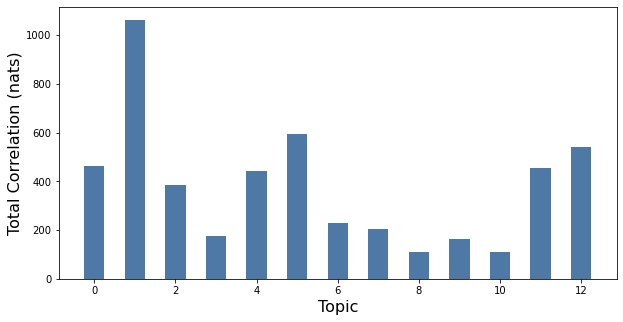

In [76]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs*1000, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

### PICKLE FOR MULTI BAR GRAPH

In [72]:
list_1200K_topic_distimport pickle

In [73]:
list_1200K_topic_distlist_1200K_topic_distlist_1200K_topic_dist = list(topic_model.tcs)

In [77]:
list_1200K_topic_dist = list(topic_model.tcs*1000)

In [78]:
with open('list_1200K_topic_dist.pickle','wb') as to_write:
    pickle.dump(list_1200K_topic_dist, to_write)
    pickle.dump(list_1200K_topic_dist, to_write)

In [56]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [57]:
def top_tweets_word_cloud(topic_number,n_docs):
    top_tweets = topic_model.get_top_docs(topic=topic_number,n_docs=n_docs)
    top_tweet_list = []
    for each_tuple in top_tweets:
         top_tweet_list.append(phrases_1200K_list[each_tuple[0]])
    top_tweet_string = " ".join(top_tweet_list)
    wordcloud_topic = WordCloud(collocations=False).generate(top_tweet_string)
    plt.imshow(wordcloud_topic, interpolation='bilinear')
    plt.axis("off")
    plt.show()

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


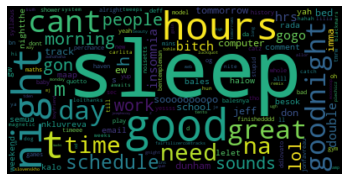

In [58]:
top_tweets_word_cloud(0,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


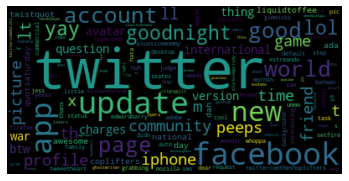

In [59]:
top_tweets_word_cloud(1,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


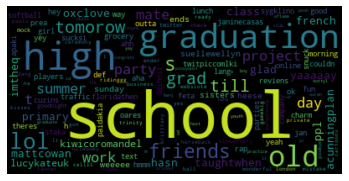

In [60]:
top_tweets_word_cloud(2,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


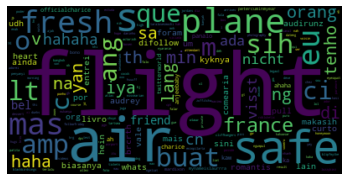

In [61]:
top_tweets_word_cloud(3,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


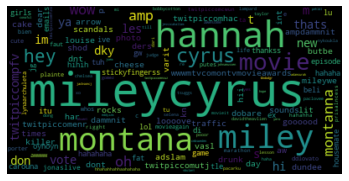

In [62]:
top_tweets_word_cloud(4,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


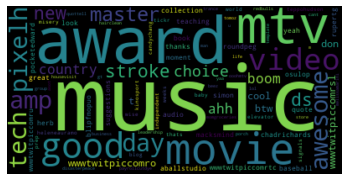

In [63]:
top_tweets_word_cloud(5,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


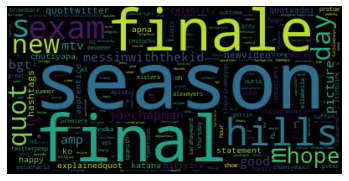

In [64]:
top_tweets_word_cloud(6,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


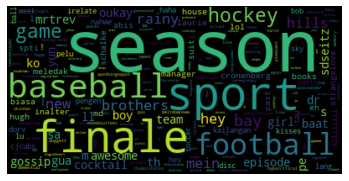

In [65]:
top_tweets_word_cloud(7,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


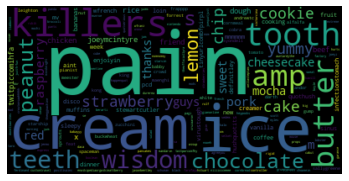

In [66]:
top_tweets_word_cloud(8,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


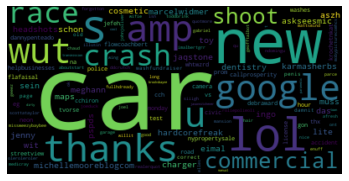

In [67]:
top_tweets_word_cloud(9,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


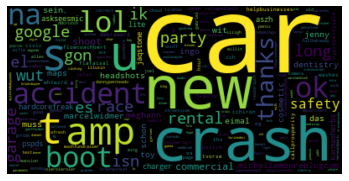

In [68]:
top_tweets_word_cloud(9,100)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


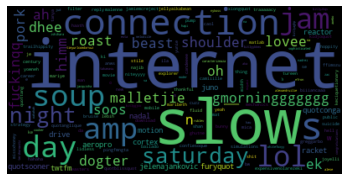

In [69]:
top_tweets_word_cloud(10,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


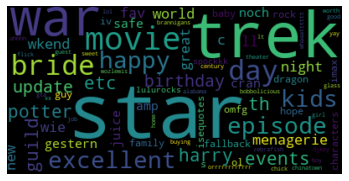

In [70]:
top_tweets_word_cloud(11,50)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


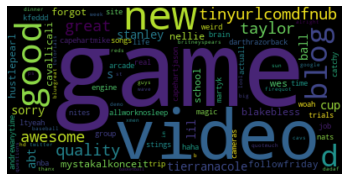

In [71]:
top_tweets_word_cloud(12,50)